# Lyft - Bay Wheels bike share service, Bay Area.

Lyft operates a bike sharing service in 5 cities across the United States.
* New York
* Bay Area, San Francisco
* Metro DC, Washington D.C.
* Columbus, Ohio
* Chicago

The dataset is analysed to present a charts and interpretations of the user demographics, the duration of usage and correlations between data (if any).

In [18]:
# load libraries
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from pathlib import Path
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import statistics

%matplotlib inline 
sns.set(color_codes=True)

In [19]:
# load and display table
dir = Path("./data")
df = (pd.read_csv(f, encoding = "ISO-8859-1") for f in dir.glob("*.csv"))
df = pd.concat(df)
df.head()

,month,trip_duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,January,80825,229.0,Foothill Blvd at 42nd Ave,196.0,Grand Ave at Perkins St,4861,Subscriber,1989.0,Male
1,January,65900,4.0,Cyril Magnin St at Ellis St,134.0,Valencia St at 24th St,5506,Subscriber,1989.0,Male
2,January,62633,245.0,Downtown Berkeley BART,157.0,65th St at Hollis St,2717,Customer,1965.0,Female
3,January,44680,85.0,Church St at Duboce Ave,53.0,Grove St at Divisadero,4557,Customer,1974.0,Male
4,January,60709,16.0,Steuart St at Market St,28.0,The Embarcadero at Bryant St,2100,Customer,NaN,NaN


## Exploring data and removing null values

In [20]:
# dropping irrelevant columns
df = df.drop(["bike_id", "start_station_name", "end_station_name"], axis = 1)
duplicate_rows_df = df[df.duplicated()]
df = df.drop_duplicates()
df.head(5)

# remove null values
df = df.dropna()

df.head(5)

,month,trip_duration_sec,start_station_id,end_station_id,user_type,member_birth_year,member_gender
0,January,80825,229.0,196.0,Subscriber,1989.0,Male
1,January,65900,4.0,134.0,Subscriber,1989.0,Male
2,January,62633,245.0,157.0,Customer,1965.0,Female
3,January,44680,85.0,53.0,Customer,1974.0,Male
5,January,6733,245.0,266.0,Subscriber,1994.0,Male


In [21]:
# Calculate a new column, "age", from "member_birth_year"
df["member_birth_year"] = df.apply(lambda row: int(row.member_birth_year), axis = 1)
df["age"] = df.apply(lambda row: int(2019 - row.member_birth_year), axis = 1)

df.head(5)

,month,trip_duration_sec,start_station_id,end_station_id,user_type,member_birth_year,member_gender,age
0,January,80825,229.0,196.0,Subscriber,1989,Male,30
1,January,65900,4.0,134.0,Subscriber,1989,Male,30
2,January,62633,245.0,157.0,Customer,1965,Female,54
3,January,44680,85.0,53.0,Customer,1974,Male,45
5,January,6733,245.0,266.0,Subscriber,1994,Male,25


## Univariate analysis


In [5]:
# Range of user birth dates
birth_year_data = df.sort_values(by = "member_birth_year")
birth_year_data.reset_index()
print("Range of birth dates of users in this dataset: %s - %s"%(birth_year_data.iloc[1, 5], birth_year_data.iloc[len(birth_year_data) - 1, 5]))

Range of birth dates of users in this dataset: 1878 - 2001


**The distribution of user ages above don't seem correct as some users might entered unlikely values during the registration process (e.g. 1878)**



### Detecting outliers with box and whiskers plot
Before performing analysis on the data, outliers should be detected with a box and whiskers plot to represent the data visually.

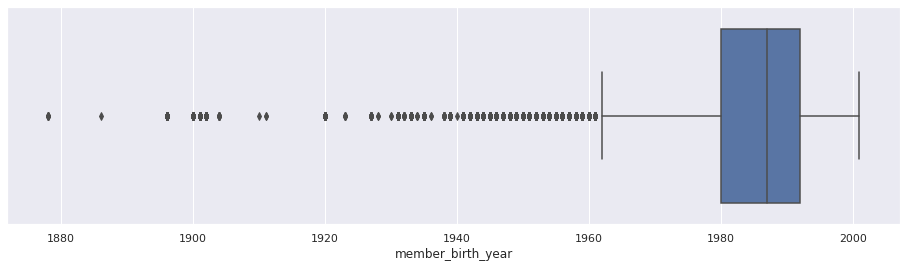

In [6]:
# Detecting outliers with a box-and-whiskers-plot
plt.figure(figsize = (16, 4))
outliers = sns.boxplot(x = df["member_birth_year"])

#### Remove outliers from the dataframe which were born before the year 1962

member_birth_year
1963     6732
1964     6651
1965     8912
1966     6601
1967     7674
1968    11052
1969     8222
1970    10685
1971    11264
1972    10572
1973    12636
1974    14544
1975    13877
1976    13965
1977    16842
1978    17089
1979    20383
1980    27162
1981    25680
1982    28953
1983    33121
1984    36504
1985    38901
1986    43578
1987    47132
1988    56784
1989    53138
1990    50569
1991    49173
1992    47890
1993    49906
1994    44622
1995    41136
1996    28478
1997    18049
1998    15812
1999    12156
2000     7820
2001      321
dtype: int64


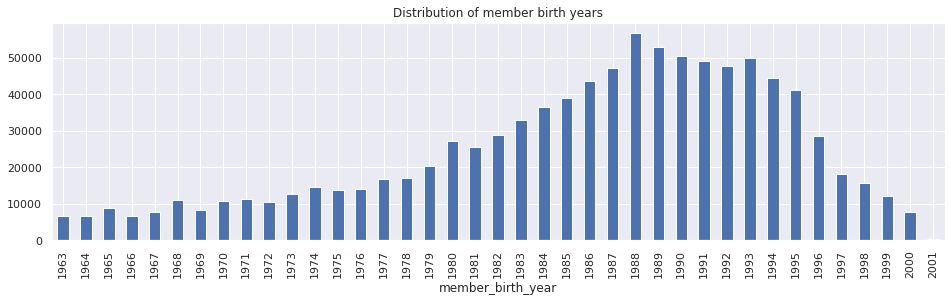

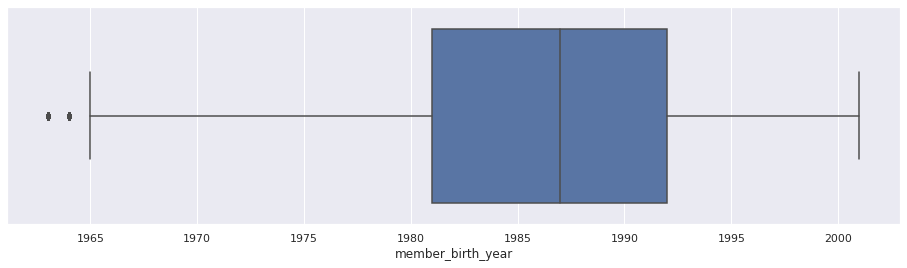

In [7]:
df = df.loc[df["member_birth_year"] > 1962]
year_data = df.sort_values(by = "member_birth_year")
birthyear_chart = year_data.groupby("member_birth_year").size()
print(birthyear_chart)
birthyear_chart.plot.bar(title = "Distribution of member birth years", figsize = (16, 4))
plt.figure(figsize = (16, 4))
outliers = sns.boxplot(x = df["member_birth_year"])

**Observation:** Most users were born between the years 1988 to 1993

In [8]:
df.head(5)
birth_year_data = df.sort_values(by = "member_birth_year")
birth_year_data.reset_index()
birth_year_data.head(5)
print("Range of birth dates of users in this dataset: %s - %s"%(birth_year_data.iloc[1, 5], birth_year_data.iloc[len(birth_year_data) - 1, 5]))

Range of birth dates of users in this dataset: 1963 - 2001


**The range of users above are a good target for marketing campaigns!**

### User types ( subscriber or customer )

user_type
Customer      111350
Subscriber    843236
dtype: int64


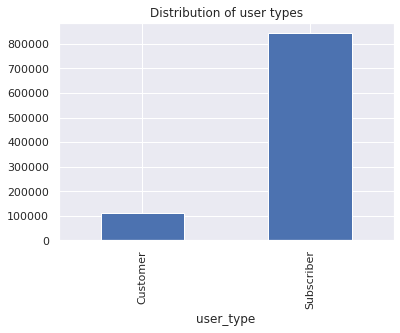

In [9]:
# Get types of users, "subscriber" and "customers"
user_type = df.groupby("user_type").size()
print(user_type)
user_type.plot.bar(title = "Distribution of user types")

**Observation:** Most users are subscribers **(88.3%)** as opposed to one-time customers **(11.7%)**.

### User Gender

member_gender
Female    230654
Male      705275
Other      18657
dtype: int64 
Total: 954586


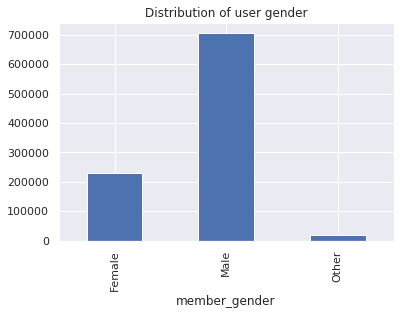

In [10]:
# get user genders
user_type = df.groupby("member_gender").size()
print(user_type, "\nTotal: 954586")
user_type.plot.bar(title = "Distribution of user gender")

**Observation:** An overwhelming majority of users are _male_ **(73.88%)**.

### Which months are the busiest?

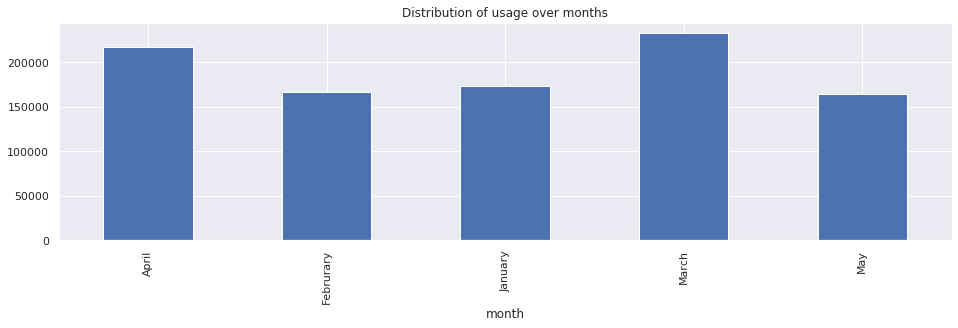

In [11]:
# display a bar graph to display the usage over a period of 5 months
month_usage = df.groupby("month").size()
month_usage.plot.bar(title = "Distribution of usage over months", figsize = (16, 4))

**Observation:** The two busiest months are April and March.

### Baby Boomers vs. Millennials?

### Age vs. Trip Duration

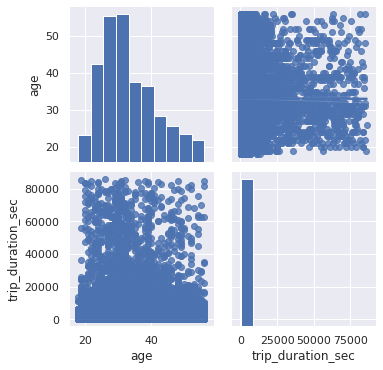

In [51]:
sns.pairplot(df, vars = ["age", "trip_duration_sec"],  kind = "reg")
plt.show()

In [52]:
# Calculate correlation between age and trip duration
correlations = df[["trip_duration_sec","age"]].corr(method="pearson")
print(correlations)

                   trip_duration_sec       age
trip_duration_sec           1.000000 -0.000424
age                        -0.000424  1.000000


**Lets take a look at the data plotted on a scatter plot to make sure.**

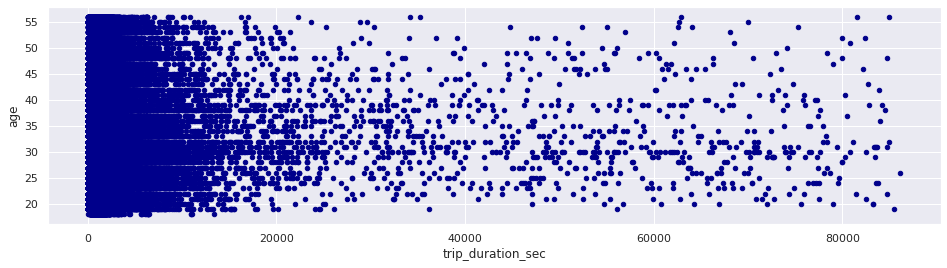

In [41]:
df.plot.scatter(x = "trip_duration_sec", y = "age", c='DarkBlue', figsize = (16, 4))

**Conclusion:** There is no correlation between age and trip-duration